## Combined all the data into a big df/csv

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
date_format_1 = lambda x: datetime.strptime(x, '%Y-%m-%d')
date_format_2 = lambda x: datetime.strptime(x, '%d/%m/%Y')

df_price_000969_SZ = pd.read_csv("Datasets/Advanced Technology _ Materials Co., Ltd. (000969.SZ) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_ASM_AX = pd.read_csv("Datasets/ASM.AX.csv", parse_dates=['Date'], date_parser=date_format_2)
df_price_000970_SZ = pd.read_csv("Datasets/Beijing Zhong Ke San Huan High-Tech Co., Ltd. (000970.SZ) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_300127_SZ = pd.read_csv("Datasets/Chengdu Galaxy Magnets Co.,Ltd. (300127.SZ) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_000795_SZ = pd.read_csv("Datasets/Innuovo Technology Co., Ltd. (000795.SZ) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_interpolated_ev_sales = pd.read_csv("Datasets/Interpolated EV Sales.csv", parse_dates=['Date'], date_parser=date_format_2)
df_interpolated_wind_energy = pd.read_csv("Datasets/Interpolated Wind Energy.csv", parse_dates=['Date'], date_parser=date_format_1)
df_spline_interpolated_ev_sales = pd.read_csv("Datasets/Spline Interpolated EV Sales.csv", parse_dates=['Date'], date_parser=date_format_2)
df_spline_interpolated_wind_energy = pd.read_csv("Datasets/Spline Interpolated Wind Energy.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_LYC_AX = pd.read_csv("Datasets/LYC.AX.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_MP = pd.read_csv("Datasets/MP.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_NEO_TO = pd.read_csv("Datasets/NEO.TO.csv", parse_dates=['Date'], date_parser=date_format_2)
df_price_neodymium = pd.read_excel("Datasets/Neodymium Prices.xlsx", parse_dates=['Date'], date_parser=date_format_1)
df_price_600366_SS = pd.read_csv("Datasets/Ningbo Yunsheng Co., Ltd. (600366.SS) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_600259_SS = pd.read_csv("Datasets/Rising Nonferrous Metals Share Co.,Ltd. (600259.SS) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_002057_SZ = pd.read_csv("Datasets/Sinosteel New Materials Co., Ltd. (002057.SZ) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_UUUU = pd.read_csv("Datasets/UUUU.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_300224_SZ = pd.read_csv("Datasets/Yantai Zhenghai Magnetic Material Co., Ltd. (300224.SZ) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_002249_SZ = pd.read_csv("Datasets/Zhongshan Broad-Ocean Motor Co., Ltd. (002249.SZ) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_USD_CNY = pd.read_csv("Datasets/USD_CNY.csv", parse_dates=['Date'], date_parser=date_format_2)


In [3]:
all_df_price_names = [df_price_000969_SZ, df_price_ASM_AX, df_price_000970_SZ, df_price_300127_SZ, df_price_000795_SZ, df_price_LYC_AX, df_price_MP, df_price_NEO_TO, df_price_600366_SS, df_price_600259_SS, df_price_002057_SZ, df_price_UUUU, df_price_300224_SZ, df_price_002249_SZ, df_price_USD_CNY]
all_price_names = ["000969_SZ", "ASM_AX", "000970_SZ", "300127_SZ", "000795_SZ", "LYC_AX", "MP", "NEO_TO", "600366_SS", "600259_SS", "002057_SZ", "UUUU", "300224_SZ", "002249_SZ", "USD_CNY"]
all_df_other_names = [df_interpolated_ev_sales, df_interpolated_wind_energy, df_spline_interpolated_ev_sales, df_spline_interpolated_wind_energy]
all_other_names = ["ev_sales", "wind_energy", "spline_ev_sales", "spline_wind_energy"]

In [4]:

for name in all_df_price_names: 
    name["Date"] = pd.to_datetime(name["Date"])
for name in all_df_other_names:
    name["Date"] = pd.to_datetime(name["Date"])

df_price_neodymium["Date"] = pd.to_datetime(df_price_neodymium["Date"])

In [5]:
df = pd.DataFrame()
for i in range(len(all_df_price_names)): 
    relevant_df = all_df_price_names[i][["Date", "Adj Close", "Volume"]]
    relevant_df = relevant_df.rename(columns = {"Adj Close" : f"Adj Close {all_price_names[i]}", "Volume" : f"Volume {all_price_names[i]}"})
    relevant_df = relevant_df.set_index("Date")
    df = df.join(relevant_df, how = "outer")

for i in range(len(all_df_other_names)):
    try :
        relevant_df = all_df_other_names[i][["Date", "Interpolated Demand", "Interpolated Value"]]
        relevant_df = relevant_df.rename(columns = {"Interpolated Demand": f"Interpolated Demand {all_other_names[i]}", "Interpolated Value" : f"Interpolated Value {all_other_names[i]}"})
        relevant_df = relevant_df.set_index("Date")
        df = df.join(relevant_df, how = "outer")
    except:
        relevant_df = all_df_other_names[i][["Date", "Interpolated Value"]]
        relevant_df = relevant_df.rename(columns = {"Interpolated Value" : f"Interpolated Value {all_other_names[i]}"})
        relevant_df = relevant_df.set_index("Date")
        df = df.join(relevant_df, how = "outer")

In [6]:
df =df.drop(columns=["Volume USD_CNY"])

In [7]:
df_price_neodymium = df_price_neodymium.set_index("Date")
df = df.join(df_price_neodymium, how = "left")

In [8]:
df["Price (CNY/T)"] = df["Price (CNY/T)"].shift(periods = 30) ## Adding response variable to the df, shift 30 days look ahead period 

## Extract data from jan 2021 to oct 2022 and preprocess it further 

In [9]:
df = df[df.index > "2021-01-01"] # Look at data after 4 jan 2020 
df = df[df.index < "2022-12-31"]
df = df.fillna(method = "ffill")
df = df.tail(-2)

In [10]:
df

,Adj Close 000969_SZ,Volume 000969_SZ,Adj Close ASM_AX,Volume ASM_AX,Adj Close 000970_SZ,Volume 000970_SZ,Adj Close 300127_SZ,Volume 300127_SZ,Adj Close 000795_SZ,Volume 000795_SZ,...,Adj Close 002249_SZ,Volume 002249_SZ,Adj Close USD_CNY,Interpolated Demand ev_sales,Interpolated Value ev_sales,Interpolated Value wind_energy,Interpolated Demand spline_ev_sales,Interpolated Value spline_ev_sales,Interpolated Value spline_wind_energy,Price (CNY/T)
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,6.713665,14145487.0,6.579282,299924.0,9.721244,25615730.0,16.844931,5962203.0,5.59,17232127.0,...,4.373618,96506968.0,6.5320,23570.37653,9.944049e+08,2812.868336,22640.71798,9.536076e+08,2713.554134,635000.0
2021-01-05,6.753568,13718457.0,6.619217,401540.0,9.750911,16332830.0,17.007177,6788244.0,5.57,12893976.0,...,4.316941,78225479.0,6.4605,23486.75732,9.910441e+08,2809.391347,22274.03642,9.378735e+08,2683.404211,635000.0
2021-01-06,6.613908,11556685.0,6.329688,559510.0,9.701465,13923363.0,16.510895,5067661.0,5.43,14612100.0,...,4.175247,60969682.0,6.4552,23403.13810,9.876834e+08,2805.914358,21922.38212,9.228186e+08,2656.312544,635000.0
2021-01-07,6.514151,13426712.0,6.110046,323868.0,9.661907,18112475.0,16.215036,5105801.0,5.36,15409792.0,...,4.118569,57241206.0,6.4607,23319.51888,9.843226e+08,2802.437369,21586.72428,9.084829e+08,2632.184547,625000.0
2021-01-08,6.753568,20120275.0,5.650794,1093415.0,9.711353,18551280.0,15.785563,5342705.0,5.23,18467772.0,...,4.203585,68194148.0,6.4772,23235.89966,9.809619e+08,2798.960380,21268.03210,8.949061e+08,2610.925633,625000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,8.070000,20053827.0,1.420000,302009.0,12.590000,19124868.0,15.190000,1965480.0,6.50,9191346.0,...,5.150000,11835392.0,6.9722,61323.90742,2.521404e+09,2976.092394,61323.90742,2.521404e+09,2976.092394,905000.0
2022-12-27,8.140000,33289617.0,1.420000,302009.0,13.850000,90710906.0,15.970000,6278960.0,6.68,17859983.0,...,5.190000,10419563.0,6.9722,61323.90742,2.521404e+09,2976.092394,61323.90742,2.521404e+09,2976.092394,905000.0
2022-12-28,7.930000,21105880.0,1.370000,275839.0,13.950000,95619502.0,15.690000,2549844.0,6.72,19388733.0,...,5.140000,7233929.0,6.9722,61323.90742,2.521404e+09,2976.092394,61323.90742,2.521404e+09,2976.092394,905000.0


In [11]:
df.isnull().values.any()

False

In [12]:
import matplotlib.pyplot as plt

In [13]:
df.to_csv("combined_raw_variables.csv")

In [14]:
df.corr(numeric_only=True)

,Adj Close 000969_SZ,Volume 000969_SZ,Adj Close ASM_AX,Volume ASM_AX,Adj Close 000970_SZ,Volume 000970_SZ,Adj Close 300127_SZ,Volume 300127_SZ,Adj Close 000795_SZ,Volume 000795_SZ,...,Adj Close 002249_SZ,Volume 002249_SZ,Adj Close USD_CNY,Interpolated Demand ev_sales,Interpolated Value ev_sales,Interpolated Value wind_energy,Interpolated Demand spline_ev_sales,Interpolated Value spline_ev_sales,Interpolated Value spline_wind_energy,Price (CNY/T)
Adj Close 000969_SZ,1.000000,0.585049,0.530803,0.129911,0.525193,0.412010,0.845397,0.525611,0.556905,0.533141,...,0.891481,0.394662,-0.147074,0.226302,0.182476,0.004460,0.233099,0.190745,0.002769,0.087071
Volume 000969_SZ,0.585049,1.000000,0.329118,0.071897,0.054053,0.270875,0.453898,0.622067,0.107206,0.315528,...,0.336449,0.432837,-0.205919,-0.056039,-0.053527,-0.244440,-0.039612,-0.036841,-0.248290,-0.300071
Adj Close ASM_AX,0.530803,0.329118,1.000000,0.001628,-0.179163,0.096760,0.737609,0.467520,0.008264,0.332679,...,0.676765,0.487761,-0.754990,-0.386442,-0.422951,0.276085,-0.354596,-0.386703,0.274043,-0.068194
Volume ASM_AX,0.129911,0.071897,0.001628,1.000000,0.095981,0.036353,0.072453,0.121034,0.062721,0.040302,...,0.116643,0.057130,0.193079,0.153246,0.146057,-0.065175,0.154153,0.147904,-0.073848,-0.026228
Adj Close 000970_SZ,0.525193,0.054053,-0.179163,0.095981,1.000000,0.487799,0.363170,0.061192,0.773868,0.375828,...,0.467959,-0.146889,0.418175,0.547216,0.492878,0.035580,0.517922,0.461952,0.033012,0.487074
Volume 000970_SZ,0.412010,0.270875,0.096760,0.036353,0.487799,1.000000,0.352714,0.442883,0.295544,0.301757,...,0.319221,0.211831,0.027329,0.057236,0.026337,-0.115529,0.051976,0.020832,-0.106921,0.028530
Adj Close 300127_SZ,0.845397,0.453898,0.737609,0.072453,0.363170,0.352714,1.000000,0.653884,0.571837,0.656136,...,0.876450,0.400478,-0.430068,0.029821,-0.015131,0.326017,0.052005,0.010061,0.318498,0.164386
Volume 300127_SZ,0.525611,0.622067,0.467520,0.121034,0.061192,0.442883,0.653884,1.000000,0.153941,0.464085,...,0.405916,0.508123,-0.289175,-0.152185,-0.164215,-0.126150,-0.120789,-0.130381,-0.127081,-0.245187
Adj Close 000795_SZ,0.556905,0.107206,0.008264,0.062721,0.773868,0.295544,0.571837,0.153941,1.000000,0.705948,...,0.547786,-0.153841,0.181331,0.525944,0.483152,0.357474,0.523765,0.480471,0.347689,0.643970
Volume 000795_SZ,0.533141,0.315528,0.332679,0.040302,0.375828,0.301757,0.656136,0.464085,0.705948,1.000000,...,0.508915,0.176656,-0.205465,0.081035,0.048776,0.243205,0.108316,0.076890,0.235976,0.265407


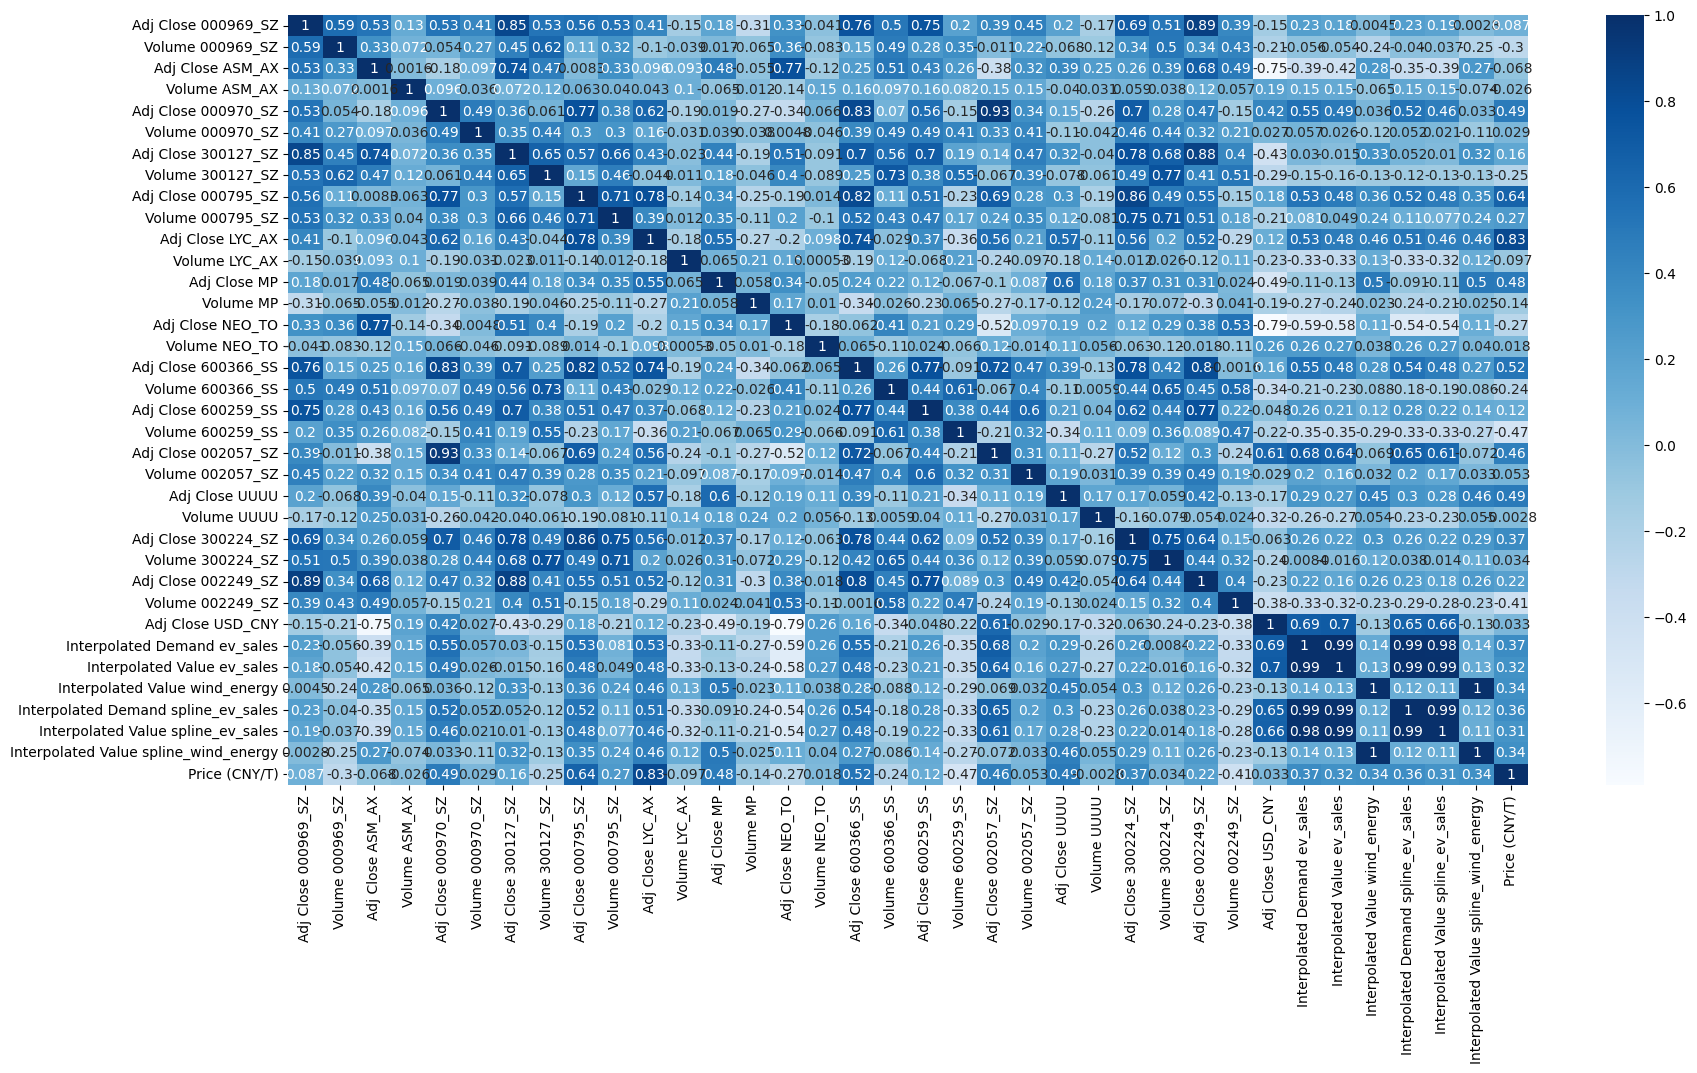

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
ax =  sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

In [18]:
df.corr(method="spearman")

,Adj Close 000969_SZ,Volume 000969_SZ,Adj Close ASM_AX,Volume ASM_AX,Adj Close 000970_SZ,Volume 000970_SZ,Adj Close 300127_SZ,Volume 300127_SZ,Adj Close 000795_SZ,Volume 000795_SZ,...,Adj Close 002249_SZ,Volume 002249_SZ,Adj Close USD_CNY,Interpolated Demand ev_sales,Interpolated Value ev_sales,Interpolated Value wind_energy,Interpolated Demand spline_ev_sales,Interpolated Value spline_ev_sales,Interpolated Value spline_wind_energy,Price (CNY/T)
Adj Close 000969_SZ,1.000000,0.565224,0.448073,0.088108,0.599064,0.544527,0.851951,0.481063,0.514209,0.533018,...,0.890025,0.306203,-0.228074,0.273236,0.213096,0.007889,0.259695,0.202778,0.003101,0.143201
Volume 000969_SZ,0.565224,1.000000,0.332628,-0.043453,0.019930,0.385343,0.369676,0.587919,-0.035395,0.255506,...,0.304992,0.630809,-0.135883,-0.184903,-0.178657,-0.365066,-0.142609,-0.141512,-0.369764,-0.362548
Adj Close ASM_AX,0.448073,0.332628,1.000000,0.017816,-0.184633,0.104679,0.677701,0.538583,-0.088358,0.341385,...,0.570771,0.510113,-0.788952,-0.371923,-0.416261,0.270558,-0.365465,-0.405430,0.305998,-0.128750
Volume ASM_AX,0.088108,-0.043453,0.017816,1.000000,0.185429,0.189638,0.107841,0.114733,0.102564,0.109375,...,0.118299,-0.134778,0.179037,0.216929,0.190812,-0.003708,0.203212,0.180611,-0.022787,0.008466
Adj Close 000970_SZ,0.599064,0.019930,-0.184633,0.185429,1.000000,0.572211,0.494182,0.051247,0.875273,0.502417,...,0.597105,-0.272751,0.267135,0.717587,0.667890,0.234686,0.659947,0.614812,0.195220,0.574274
Volume 000970_SZ,0.544527,0.385343,0.104679,0.189638,0.572211,1.000000,0.518394,0.551922,0.434224,0.623863,...,0.441154,0.190062,0.148567,0.228535,0.190857,-0.052190,0.217295,0.184755,-0.076176,0.056903
Adj Close 300127_SZ,0.851951,0.369676,0.677701,0.107841,0.494182,0.518394,1.000000,0.604533,0.522475,0.669468,...,0.885881,0.302742,-0.510842,0.135013,0.073537,0.267711,0.124084,0.065295,0.266306,0.227990
Volume 300127_SZ,0.481063,0.587919,0.538583,0.114733,0.051247,0.551922,0.604533,1.000000,0.133570,0.673746,...,0.372356,0.586622,-0.317965,-0.218774,-0.224318,-0.135747,-0.172158,-0.182321,-0.133297,-0.216622
Adj Close 000795_SZ,0.514209,-0.035395,-0.088358,0.102564,0.875273,0.434224,0.522475,0.133570,1.000000,0.683106,...,0.544957,-0.278823,0.066447,0.655800,0.625113,0.360547,0.619552,0.589836,0.324989,0.743412
Volume 000795_SZ,0.533018,0.255506,0.341385,0.109375,0.502417,0.623863,0.669468,0.673746,0.683106,1.000000,...,0.535740,0.161049,-0.202115,0.182023,0.146607,0.200804,0.178209,0.142309,0.187942,0.371457


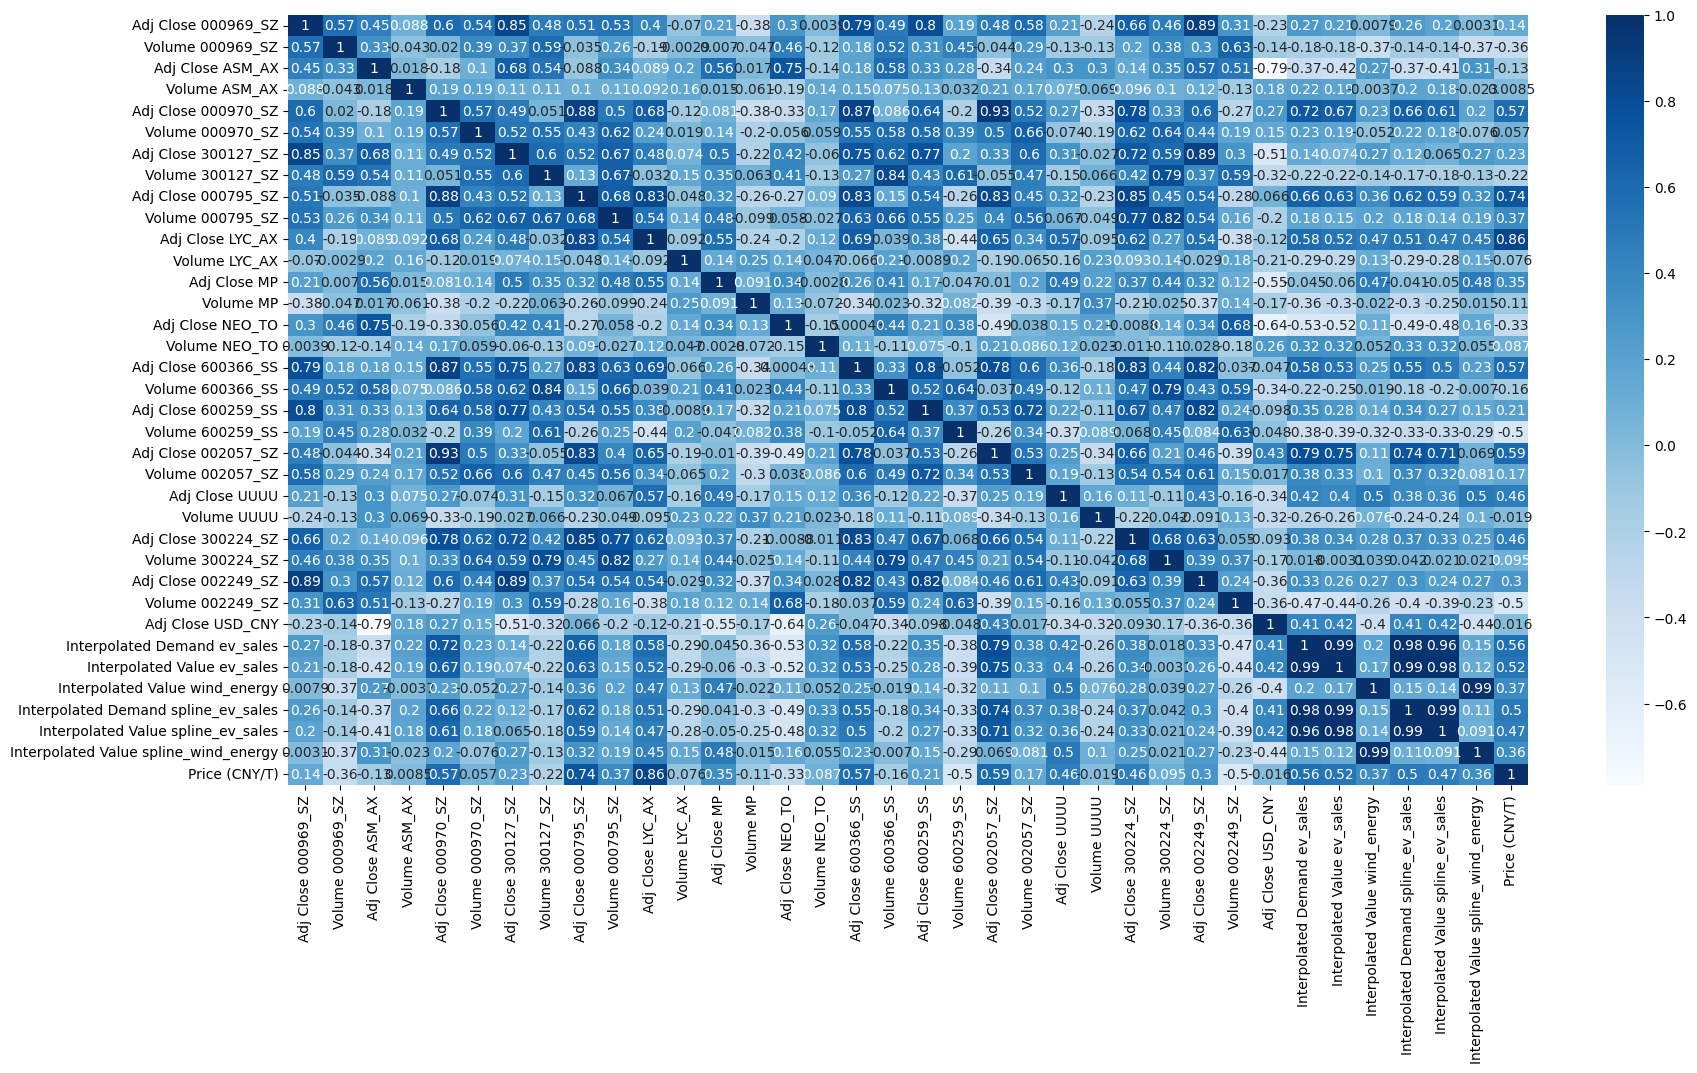

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
ax =  sns.heatmap(df.corr(numeric_only=True, method="spearman"), annot=True, cmap='Blues')

In [21]:
price_corr = df.corr(method="spearman")["Price (CNY/T)"]
price_corr[price_corr > 0.4]

Adj Close 000970_SZ                    0.574274
Adj Close 000795_SZ                    0.743412
Adj Close LYC_AX                       0.858225
Adj Close 600366_SS                    0.570089
Adj Close 002057_SZ                    0.591175
Adj Close UUUU                         0.463803
Adj Close 300224_SZ                    0.457694
Interpolated Demand ev_sales           0.555571
Interpolated Value ev_sales            0.523680
Interpolated Demand spline_ev_sales    0.496732
Interpolated Value spline_ev_sales     0.467717
Price (CNY/T)                          1.000000
Name: Price (CNY/T), dtype: float64

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [23]:
df_columns_list = df.columns.tolist()
predicted = df_columns_list[-1]
variables = df_columns_list[0:-1]
variables_string = ""
for var in variables:
    variables_string = variables_string + (var + ",")
# variables_string = variables_string[0:-1] ## Remove the last comma
variables_string = variables_string[0:19] 
linear_regression_formula = f"{variables_string} ~ {predicted}"
variables_string

'Adj Close 000969_SZ'

In [24]:
model = sm.OLS(df["Price (CNY/T)"], df.loc[:, df.columns != "Price (CNY/T)"]).fit()

In [25]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          Price (CNY/T)   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              2466.
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                        0.00
Time:                        01:35:14   Log-Likelihood:                         -9166.5
No. Observations:                 718   AIC:                                  1.840e+04
Df Residuals:                     683   BIC:                                  1.856e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------

Model Building

In [26]:
from math import sqrt
from numpy import concatenate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Bidirectional


1-Day Forecast Model

In [27]:
cols = ["Adj Close 000970_SZ", "Adj Close 000795_SZ", "Adj Close LYC_AX", "Adj Close 600366_SS", "Adj Close 002057_SZ", 
        "Adj Close UUUU", "Adj Close 300224_SZ", "Interpolated Demand spline_ev_sales", "Interpolated Value spline_ev_sales", "Price (CNY/T)"]

df2 = df[cols]

In [28]:
"""
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df_s = DataFrame(data)
    colms, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        colms.append(df_s.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        colms.append(df_s.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(colms, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
    """

"\n# convert series to supervised learning\ndef series_to_supervised(data, n_in=1, n_out=1, dropnan=True):\n    n_vars = 1 if type(data) is list else data.shape[1]\n    df_s = DataFrame(data)\n    colms, names = list(), list()\n    # input sequence (t-n, ... t-1)\n    for i in range(n_in, 0, -1):\n        colms.append(df_s.shift(i))\n    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]\n    # forecast sequence (t, t+1, ... t+n)\n    for i in range(0, n_out):\n        colms.append(df_s.shift(-i))\n    if i == 0:\n        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]\n    else:\n        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]\n    # put it all together\n    agg = concat(colms, axis=1)\n    agg.columns = names\n    # drop rows with NaN values\n    if dropnan:\n        agg.dropna(inplace=True)\n    return agg\n    "

In [29]:
scaler = MinMaxScaler(feature_range=(0, 1))
"""
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
values = df2.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)
print(reframed.head())
"""

"\n# load dataset\n#dataset = read_csv('pollution.csv', header=0, index_col=0)\nvalues = df2.values\n# integer encode direction\nencoder = LabelEncoder()\nvalues[:,4] = encoder.fit_transform(values[:,4])\n# ensure all data is float\nvalues = values.astype('float32')\n# normalize features\nscaler = MinMaxScaler(feature_range=(0, 1))\nscaled = scaler.fit_transform(values)\n# frame as supervised learning\nreframed = series_to_supervised(scaled, 1, 1)\n# drop columns we don't want to predict\nreframed.drop(reframed.columns[[10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)\nprint(reframed.head())\n"

In [30]:
df2 = df[cols]
df2["1 Day Later Price (CNY/T)"] = df2["Price (CNY/T)"].shift(-1)
scaleddf = scaler.fit_transform(df2)

C:\Users\brian\AppData\Local\Temp\ipykernel_10284\2830693539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["1 Day Later Price (CNY/T)"] = df2["Price (CNY/T)"].shift(-1)


In [31]:
# split into input and outputs
X, y = scaleddf[:-1, :-1], scaleddf[:-1, -1] # 1-day price prediction as target
# split into train, test and validation
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, shuffle=True)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [32]:
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)

(458, 1, 10) (458,) (115, 1, 10) (115,) (144, 1, 10) (144,)


In [33]:
#model
model = Sequential()
model.add(Bidirectional(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [34]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(val_X, val_y), verbose=2, shuffle=False)

Epoch 1/50
7/7 - 6s - loss: 0.2870 - val_loss: 0.2348 - 6s/epoch - 794ms/step
Epoch 2/50
7/7 - 0s - loss: 0.1950 - val_loss: 0.1777 - 56ms/epoch - 8ms/step
Epoch 3/50
7/7 - 0s - loss: 0.1597 - val_loss: 0.1514 - 55ms/epoch - 8ms/step
Epoch 4/50
7/7 - 0s - loss: 0.1521 - val_loss: 0.1432 - 52ms/epoch - 7ms/step
Epoch 5/50
7/7 - 0s - loss: 0.1455 - val_loss: 0.1355 - 55ms/epoch - 8ms/step
Epoch 6/50
7/7 - 0s - loss: 0.1366 - val_loss: 0.1277 - 55ms/epoch - 8ms/step
Epoch 7/50
7/7 - 0s - loss: 0.1256 - val_loss: 0.1202 - 52ms/epoch - 7ms/step
Epoch 8/50
7/7 - 0s - loss: 0.1140 - val_loss: 0.1113 - 56ms/epoch - 8ms/step
Epoch 9/50
7/7 - 0s - loss: 0.1063 - val_loss: 0.1005 - 57ms/epoch - 8ms/step
Epoch 10/50
7/7 - 0s - loss: 0.0962 - val_loss: 0.0896 - 56ms/epoch - 8ms/step
Epoch 11/50
7/7 - 0s - loss: 0.0905 - val_loss: 0.0807 - 55ms/epoch - 8ms/step
Epoch 12/50
7/7 - 0s - loss: 0.0812 - val_loss: 0.0729 - 55ms/epoch - 8ms/step
Epoch 13/50
7/7 - 0s - loss: 0.0717 - val_loss: 0.0635 - 56ms

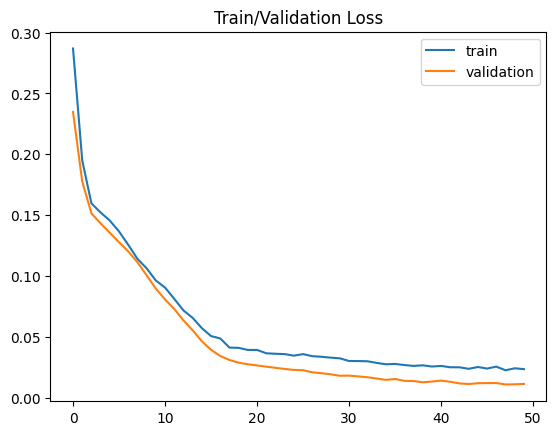

In [35]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title("Train/Validation Loss")
plt.show()

In [36]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((test_X[:, :], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_X[:, :], test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
# calculate R-Squared
r2score = r2_score(inv_y, inv_yhat)
print('Test r2score: %.3f' % r2score)

5/5 [==============================] - 1s 3ms/step
Test RMSE: 10030.353
Test r2score: 0.991


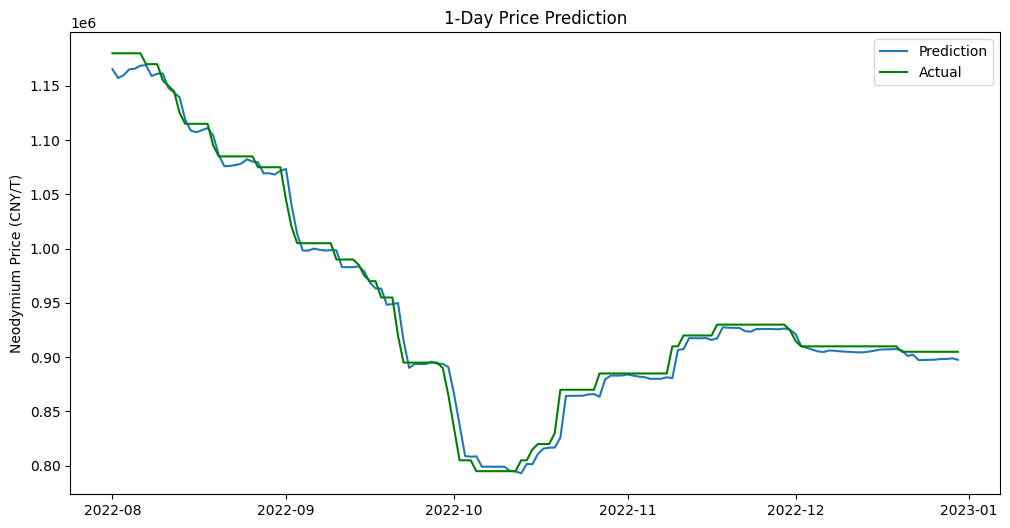

In [37]:
dates = df.index[-len(test_y):]
plt.figure(figsize=(12, 6))
plt.plot(dates, inv_yhat, label="Prediction")
plt.plot(dates, inv_y, label="Actual", color="green")
plt.title("1-Day Price Prediction")
plt.ylabel("Neodymium Price (CNY/T)")
plt.legend()

5-Days Forecast Model

In [38]:
df2 = df[cols]
df2["5 Days Later Price (CNY/T)"] = df2["Price (CNY/T)"].shift(-5)
scaleddf = scaler.fit_transform(df2)

C:\Users\brian\AppData\Local\Temp\ipykernel_10284\593153982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["5 Days Later Price (CNY/T)"] = df2["Price (CNY/T)"].shift(-5)


In [39]:
# split into input and outputs
X, y = scaleddf[:-5, :-1], scaleddf[:-5, -1] # 5-day price prediction as target
# split into train, test and validation
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, shuffle=True)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [40]:
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)

(456, 1, 10) (456,) (114, 1, 10) (114,) (143, 1, 10) (143,)


In [41]:
#model
model = Sequential()
model.add(Bidirectional(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [42]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(val_X, val_y), verbose=2, shuffle=False)

Epoch 1/50
7/7 - 7s - loss: 0.3678 - val_loss: 0.2711 - 7s/epoch - 1s/step
Epoch 2/50
7/7 - 0s - loss: 0.2698 - val_loss: 0.1849 - 52ms/epoch - 7ms/step
Epoch 3/50
7/7 - 0s - loss: 0.1942 - val_loss: 0.1563 - 52ms/epoch - 7ms/step
Epoch 4/50
7/7 - 0s - loss: 0.1617 - val_loss: 0.1546 - 50ms/epoch - 7ms/step
Epoch 5/50
7/7 - 0s - loss: 0.1550 - val_loss: 0.1592 - 53ms/epoch - 8ms/step
Epoch 6/50
7/7 - 0s - loss: 0.1434 - val_loss: 0.1568 - 74ms/epoch - 11ms/step
Epoch 7/50
7/7 - 0s - loss: 0.1381 - val_loss: 0.1471 - 69ms/epoch - 10ms/step
Epoch 8/50
7/7 - 0s - loss: 0.1298 - val_loss: 0.1353 - 67ms/epoch - 10ms/step
Epoch 9/50
7/7 - 0s - loss: 0.1209 - val_loss: 0.1243 - 64ms/epoch - 9ms/step
Epoch 10/50
7/7 - 0s - loss: 0.1143 - val_loss: 0.1138 - 57ms/epoch - 8ms/step
Epoch 11/50
7/7 - 0s - loss: 0.1021 - val_loss: 0.1034 - 52ms/epoch - 7ms/step
Epoch 12/50
7/7 - 0s - loss: 0.0975 - val_loss: 0.0946 - 52ms/epoch - 7ms/step
Epoch 13/50
7/7 - 0s - loss: 0.0902 - val_loss: 0.0854 - 51ms

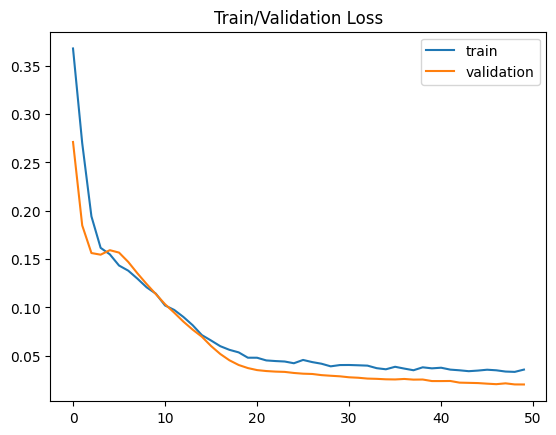

In [43]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title("Train/Validation Loss")
plt.show()

In [44]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((test_X[:, :], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_X[:, :], test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
# calculate R-Squared
r2score = r2_score(inv_y, inv_yhat)
print('Test r2score: %.3f' % r2score)

5/5 [==============================] - 1s 2ms/step
Test RMSE: 34974.710
Test r2score: 0.887


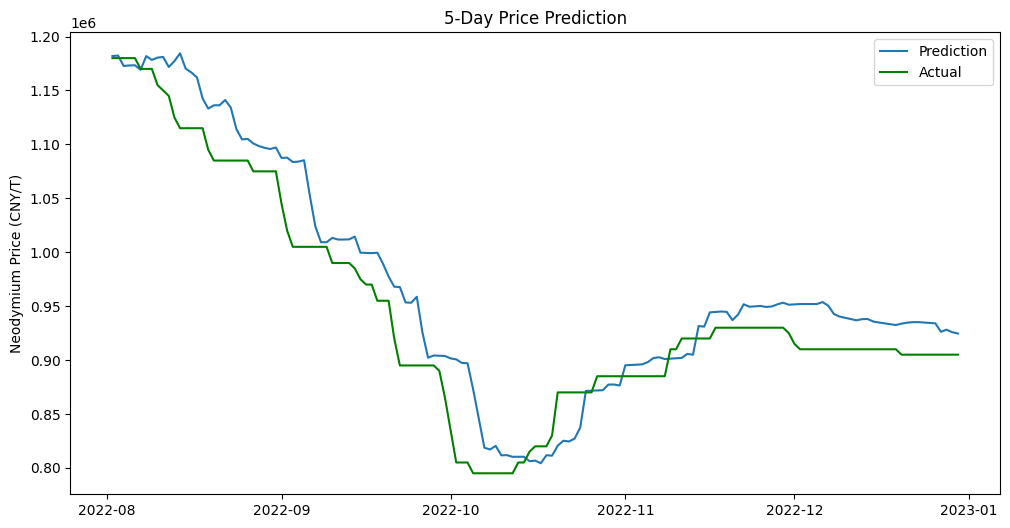

In [45]:
dates = df.index[-len(test_y):]
plt.figure(figsize=(12, 6))
plt.plot(dates, inv_yhat, label="Prediction")
plt.plot(dates, inv_y, label="Actual", color="green")
plt.title("5-Day Price Prediction")
plt.ylabel("Neodymium Price (CNY/T)")
plt.legend()